# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

In [ ]:
print(cities)

In [ ]:
#getting city coordinates now using geocoder for the next step
geocoding_url = 'http://api.openweathermap.org/geo/1.0/direct'
params = {
    'appid': weather_api_key,
    'limit': 1
}
city_lats = []
city_lons = []
for city in cities:
    params['q'] = city
    response = requests.get(geocoding_url, params).json()
    try:
        lat = response[0]['lat']
        lon = response[0]['lon']
    except:
        lat = np.nan
        lon = np.nan
    city_lats.append(lat)
    city_lons.append(lon)
print(city_lats, city_lons)

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'
params = {
    'appid': weather_api_key
}

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    params['lat'] = city_lats[i]
    params['lon'] = city_lons[i]
    city_response = requests.get(url,params).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_response['coord']['lat']
        city_lng = city_response['coord']['lon']
        city_max_temp = city_response['main']['temp_max']
        city_humidity = city_response['main']['humidity']
        city_clouds = city_response['clouds']['all']
        city_wind = city_response['wind']['speed']
        city_country = city_response['sys']['country']
        city_date = city_response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,north bend,47.4958,-121.7849,281.97,80,100,1.34,US,1681844552
1,mar del plata,-37.9977,-57.5483,291.43,44,0,6.17,AR,1681844456
2,winnemucca,40.9724,-117.7348,276.13,60,75,5.66,US,1681844553
3,isangel,-19.5411,169.2811,298.90,78,30,5.77,VU,1681844553
4,mareeba,-17.1295,143.9242,293.61,83,12,2.93,AU,1681844554


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

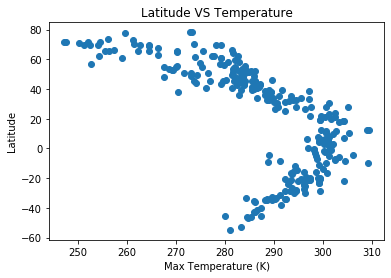

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Max Temp'],city_data_df['Lat'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('Latitude VS Temperature')
plt.ylabel('Latitude')
plt.xlabel('Max Temperature (K)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

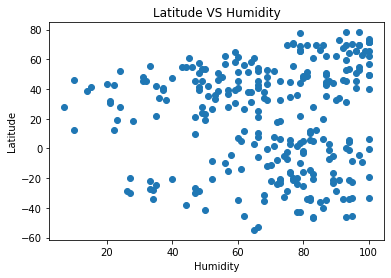

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Humidity'],city_data_df['Lat'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('Latitude VS Humidity')
plt.ylabel('Latitude')
plt.xlabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

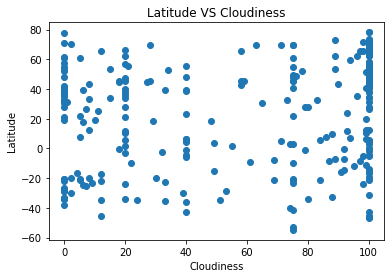

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Cloudiness'],city_data_df['Lat'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('Latitude VS Cloudiness')
plt.ylabel('Latitude')
plt.xlabel('Cloudiness')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

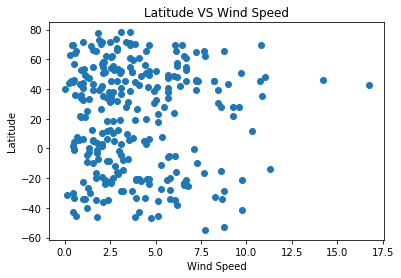

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Wind Speed'],city_data_df['Lat'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('Latitude VS Wind Speed')
plt.ylabel('Latitude')
plt.xlabel('Wind Speed')# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linreg_plot(x,y,x_title,y_title,plot_title,position):
    (m, b, rvalue, pvalue, stderr) = linregress(x, y)
    y_line = m*x + b
    line_label = f'y= {round(m,2)}x + {round(b,2)}'
    plt.scatter(x,y)
    plt.plot(x,y_line,color='red')
    plt.annotate(line_label,position,fontsize=15,color="red")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.title(plot_title)
    plt.show()
    print(line_label)
    print(f'R Squared: {rvalue**2}')

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
city_data_df.head()
mask_north = (city_data_df['Lat']>=0)
northern_hemi_df = city_data_df.loc[mask_north,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,north bend,47.4958,-121.7849,281.97,80,100,1.34,US,1681844552
2,winnemucca,40.9724,-117.7348,276.13,60,75,5.66,US,1681844553
5,varkaus,62.3176,27.8681,277.71,87,100,2.61,FI,1681844554
6,sterling,41.7883,-89.6954,286.41,51,0,2.06,US,1681844555
8,hithadhoo,1.7959,73.3876,301.68,71,55,0.45,MV,1681844556


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
city_data_df.head()
mask_south = (city_data_df['Lat']<0)
southern_hemi_df = city_data_df.loc[mask_south,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mar del plata,-37.9977,-57.5483,291.43,44,0,6.17,AR,1681844456
3,isangel,-19.5411,169.2811,298.90,78,30,5.77,VU,1681844553
4,mareeba,-17.1295,143.9242,293.61,83,12,2.93,AU,1681844554
7,springbok,-29.6660,17.8825,294.02,27,2,0.47,ZA,1681844555
12,rikitea,-23.1230,-134.9680,299.28,73,9,6.55,PF,1681844557


###  Temperature vs. Latitude Linear Regression Plot

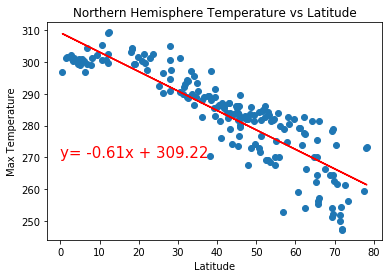

y= -0.61x + 309.22
R Squared: 0.7597792206335992


In [32]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linreg_plot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Latitude','Max Temperature', 'Northern Hemisphere Temperature vs Latitude',(0,270))

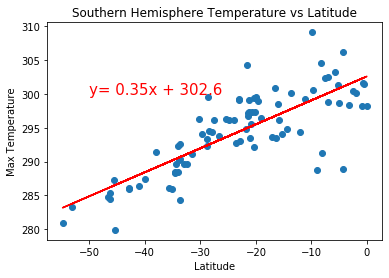

y= 0.35x + 302.6
R Squared: 0.6314863216258989


In [33]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linreg_plot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Latitude','Max Temperature', 'Southern Hemisphere Temperature vs Latitude',(-50,300))

**Discussion about the linear relationship:** 
Given that the R squared value is approaching 1 for both the southern and northern hemispheres, I would conclude that the relationship gives an indication of linearity.

### Humidity vs. Latitude Linear Regression Plot

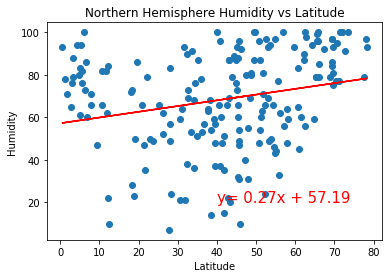

y= 0.27x + 57.19
R Squared: 0.055694698777793344


In [35]:
# Northern Hemisphere
# YOUR CODE HERE
linreg_plot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Latitude','Humidity', 'Northern Hemisphere Humidity vs Latitude',(40,20))

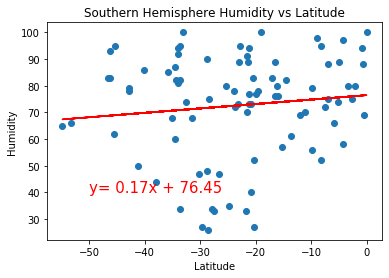

y= 0.17x + 76.45
R Squared: 0.013332020505726792


In [36]:
# Southern Hemisphere
# YOUR CODE HERE
linreg_plot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Latitude','Humidity', 'Southern Hemisphere Humidity vs Latitude',(-50,40))

**Discussion about the linear relationship:** Given that the R squared value is far from 1 for both the southern and northern hemispheres, I would conclude that the relationship gives little indication of linearity.

### Cloudiness vs. Latitude Linear Regression Plot

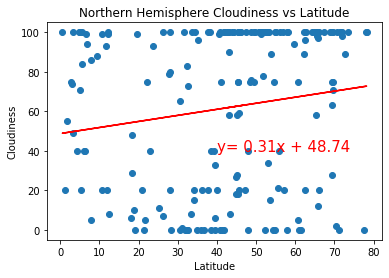

y= 0.31x + 48.74
R Squared: 0.023970078804594893


In [37]:
# Northern Hemisphere
# YOUR CODE HERE
linreg_plot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude','Cloudiness', 'Northern Hemisphere Cloudiness vs Latitude',(40,40))

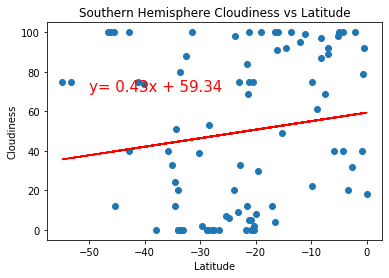

y= 0.43x + 59.34
R Squared: 0.021567328827860444


In [38]:
# Southern Hemisphere
# YOUR CODE HERE
linreg_plot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude','Cloudiness', 'Southern Hemisphere Cloudiness vs Latitude',(-50,70))

**Discussion about the linear relationship:** Given that the R squared value is far from 1 for both the southern and northern hemispheres, I would conclude that the relationship gives little indication of linearity.

### Wind Speed vs. Latitude Linear Regression Plot

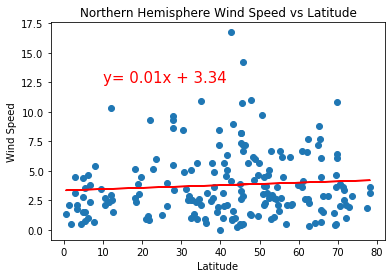

y= 0.01x + 3.34
R Squared: 0.0061593517180015805


In [39]:
# Northern Hemisphere
# YOUR CODE HERE
linreg_plot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Latitude','Wind Speed', 'Northern Hemisphere Wind Speed vs Latitude',(10,12.5))

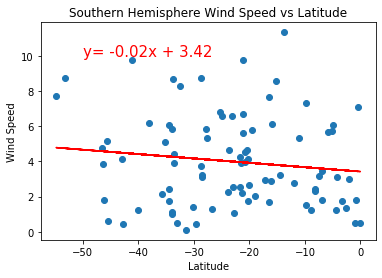

y= -0.02x + 3.42
R Squared: 0.016572161878195567


In [40]:
# Southern Hemisphere
# YOUR CODE HERE
linreg_plot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Latitude','Wind Speed', 'Southern Hemisphere Wind Speed vs Latitude',(-50,10))

**Discussion about the linear relationship:** Given that the R squared value is far from 1 for both the southern and northern hemispheres, I would conclude that the relationship gives little indication of linearity.